https://www.kaggle.com/sagnik1511/flower-recognition-93-accuracy-with-neural-nets

# Importing required libraries

In [6]:
# !pip install mlxtend

In [ ]:
# main libraries
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print('version of tensorflow :',tf.__version__)

# supporting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import os
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

# Gathering file paths

In [9]:
link='flowers/flowers'

In [10]:
import os
for file in os.listdir(link):
    print(link+file)

flowers/flowersdaisy
flowers/flowersdandelion
flowers/flowersrose
flowers/flowerssunflower
flowers/flowerstulip


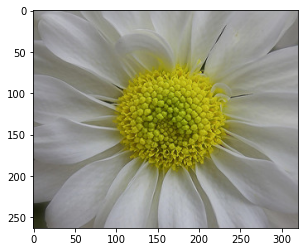

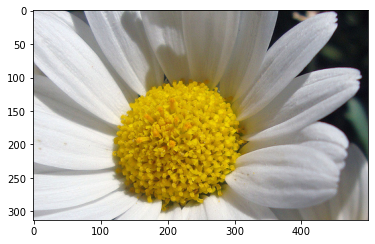

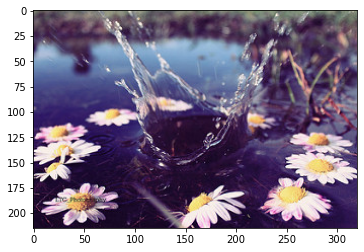

In [11]:
k=0
for fil in os.listdir('flowers/daisy/'):
  link='flowers/daisy/'+fil
  img=mpimg.imread(link)
  plt.imshow(img)
  plt.show()
  k+=1
  if k==3:
    break

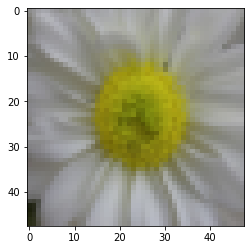

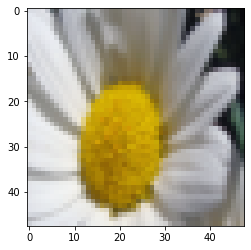

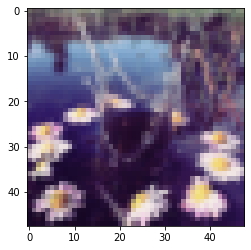

In [13]:
k = 0
for fil in os.listdir('flowers/daisy/'):
    link = 'flowers/daisy/' + fil
    img = mpimg.imread(link)
    img = resize(img, (48, 48, 3), anti_aliasing=True)
    plt.imshow(img)
    plt.show()
    k += 1
    if k == 3:
        break

# Dataframe Generation

In [14]:
def create_dataframe(path, arr, label):
    for fil in os.listdir(path):
        link = path + fil
        if link[-3:] == 'pyc' or link[-2:] == 'py':
            continue
        img = mpimg.imread(link)
        img = resize(img, (48, 48, 3), anti_aliasing=True)
        img = img.reshape(6912)
        arr.append(img)
    xx = np.ones(len(arr)) * label
    arr = pd.DataFrame(arr)
    xx = pd.DataFrame({'label': xx})
    arr = pd.concat([xx, arr], axis=1)
    return arr

In [15]:
daisy = []
daisy = create_dataframe('flowers/daisy/', daisy, 0)

In [17]:
daisy.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,0.0,0.552131,0.550851,0.546773,0.586744,0.586744,0.593096,0.631577,0.634062,0.653670,...,0.518301,0.541673,0.525987,0.522066,0.522590,0.506904,0.502982,0.508367,0.492681,0.488760
1,0.0,0.853962,0.864788,0.893178,0.853962,0.862745,0.890196,0.860948,0.867176,0.890705,...,0.643913,0.609109,0.584641,0.545425,0.560784,0.533333,0.473688,0.657190,0.623039,0.575980
2,0.0,0.410989,0.396807,0.384763,0.363930,0.322324,0.342790,0.376348,0.336649,0.369363,...,0.255556,0.161635,0.066667,0.273856,0.181413,0.076471,0.303922,0.193178,0.086275,0.323073


In [18]:
sunflower = []
sunflower = create_dataframe('flowers/sunflower/', sunflower, 1)
sunflower.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,1.0,0.102032,0.188235,0.129657,0.086489,0.172304,0.113480,0.066667,0.157108,0.076440,...,0.125490,0.141289,0.321814,0.123611,0.198805,0.363756,0.171599,0.194690,0.380392,0.188235
1,1.0,0.764706,0.800000,0.901961,0.768627,0.805882,0.905882,0.780392,0.815686,0.905882,...,0.398039,0.560784,0.610458,0.484967,0.570588,0.631373,0.513725,0.584967,0.643791,0.521569
2,1.0,0.776471,0.776471,0.839216,0.784314,0.780392,0.843137,0.788235,0.784314,0.847059,...,0.125490,0.128105,0.202614,0.151634,0.184314,0.233333,0.168627,0.225490,0.205882,0.156209


In [19]:
rose = []
rose = create_dataframe('flowers/rose/', rose, 2)
rose.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,2.0,0.045629,0.078431,0.031373,0.034926,0.078064,0.019240,0.031373,0.070588,0.014992,...,0.023938,0.014992,0.037827,0.003922,0.007475,0.027083,0.003922,0.009273,0.036724,0.007843
1,2.0,0.047059,0.047059,0.031373,0.058824,0.062745,0.047059,0.045752,0.046405,0.033987,...,0.003268,0.015033,0.015033,0.011111,0.017647,0.017647,0.011765,0.000000,0.000000,0.000000
2,2.0,0.000000,0.007843,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,...,0.003922,0.041136,0.009641,0.003922,0.101838,0.015809,0.003922,0.064624,0.011852,0.003922


In [20]:
dandelion = []
dandelion = create_dataframe('flowers/dandelion/', dandelion, 3)
dandelion.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,3.0,0.015502,0.023346,0.000000,0.023529,0.027451,0.000000,0.019138,0.023529,0.000000,...,0.000000,0.066667,0.078431,0.000000,0.070588,0.087684,0.000000,0.078431,0.094118,0.003922
1,3.0,0.285376,0.454752,0.010866,0.293219,0.466217,0.005433,0.281454,0.450831,0.000000,...,0.108592,0.422876,0.516490,0.156209,0.421569,0.525041,0.136356,0.392157,0.513725,0.077778
2,3.0,0.833824,0.837745,0.850980,0.831373,0.835294,0.854902,0.827451,0.835294,0.851471,...,0.212745,0.308824,0.295588,0.109804,0.253922,0.308333,0.062745,0.239706,0.249020,0.048529


In [21]:
tulip = []
tulip = create_dataframe('flowers/tulip/', tulip, 4)
tulip.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,4.0,0.073243,0.202042,0.080031,0.053002,0.162173,0.066728,0.013766,0.096732,0.038562,...,0.228547,0.253193,0.387582,0.254902,0.264706,0.407149,0.268627,0.275776,0.410165,0.279698
1,4.0,0.122753,0.142361,0.059967,0.074020,0.093142,0.031373,0.092279,0.092279,0.054883,...,0.212500,0.340482,0.373897,0.224818,0.584513,0.545139,0.536520,0.274551,0.303093,0.204032
2,4.0,0.396458,0.409355,0.302422,0.463235,0.506904,0.312628,0.468423,0.509455,0.323589,...,0.090033,0.113399,0.091993,0.084150,0.199101,0.160335,0.136806,0.173080,0.125992,0.111479


In [22]:
len(daisy),len(sunflower),len(rose),len(dandelion),len(tulip)

(769, 734, 784, 1052, 984)

Теперь мы можем напрямую объединить эти 5 фреймов данных, а затем разделить их на 2 фрейма данных для обучения и тестирования. Но поскольку у нас есть разное количество атрибутов во фреймах, мы в конечном итоге создадим несбалансированные фреймы данных, что приведет к плохому прогнозу. 

Итак, мы разделяем различные фреймы данных цветов на тестовое разделение на 80-20 поездов, а затем добавляем их в тренировочный и тестовый фрейм данных, после чего перетасовываем данные и создаем окончательные данные для прогнозирования.

In [23]:
tr1 = daisy.drop('label', 1)
ts1 = daisy['label']

X_train, X_test, y_train, y_test = train_test_split(tr1,
                                                    ts1,
                                                    test_size=0.2,
                                                    random_state=0)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

tr1 = sunflower.drop('label', 1)
ts1 = sunflower['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = rose.drop('label', 1)
ts1 = rose['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = dandelion.drop('label', 1)
ts1 = dandelion['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = tulip.drop('label', 1)
ts1 = tulip['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 481 to 684
Columns: 6912 entries, 0 to 6911
dtypes: float64(6912)
memory usage: 182.3 MB


Теперь мы собираемся проверить количество цветов в трейне и протестировать.

In [25]:
flowers=['daisy','sunflower','rose','dandelion','tulip']

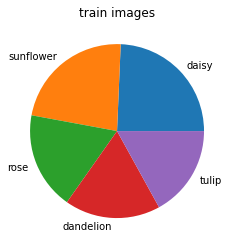

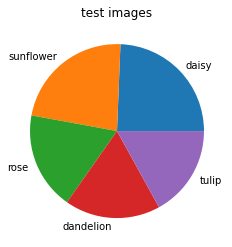

In [26]:
plt.title('train images')
plt.pie(y_train['label'].value_counts().values, labels=flowers)
plt.show()

plt.title('test images')
plt.pie(y_test['label'].value_counts().values, labels=flowers)
plt.show()

# Train & Test Data Generation

## 0
Теперь нам нужно разделить данные на обучение и тестирование, и после этого мы собираемся разделить целевые значения из фреймов данных.

In [27]:
train=pd.concat([y_train,X_train],axis=1)
test=pd.concat([y_test,X_test],axis=1)

После получения данных поезда и тестирования мы перемешиваем данные, что приведет к уничтожению ненужных шаблонов.

In [30]:
train=train.sample(frac=1)
test=test.sample(frac=1)

In [31]:
train.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
211,0.0,0.198693,0.380392,0.604575,0.011765,0.260784,0.609804,0.000000,0.255556,0.635948,...,0.701307,0.000000,0.200000,0.694118,0.000000,0.190196,0.694118,0.000000,0.184314,0.694118
598,2.0,0.666013,0.047059,0.117647,0.535294,0.011111,0.084967,0.633333,0.007190,0.084967,...,0.086928,0.466013,0.031373,0.124837,0.447059,0.038562,0.121569,0.393464,0.058824,0.107190
376,2.0,0.106745,0.102824,0.109472,0.065931,0.065931,0.065931,0.029070,0.027262,0.027328,...,0.638445,0.650408,0.664297,0.687760,0.667142,0.682353,0.705775,0.643260,0.657802,0.681245


## X and Y preparation
Сейчас мы готовим X_train, y_train, X_test и y_test, которые будут загружены после некоторых процессов.

In [32]:
X_train=train.drop('label',1)
y_train=train['label']
X_test=test.drop('label',1)
y_test=test['label']

In [33]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [35]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

Поскольку мы должны найти ответы для обычных людей, мы также используем массив цветов в качестве декодера, так как название цветов было закодировано.

In [37]:
decoder=flowers
decoder

['daisy', 'sunflower', 'rose', 'dandelion', 'tulip']

Поскольку изображения сглаживаются, мы должны изменить их форму для визуализации.

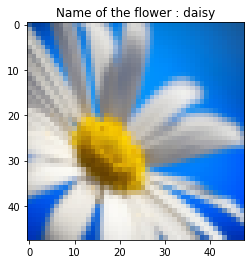

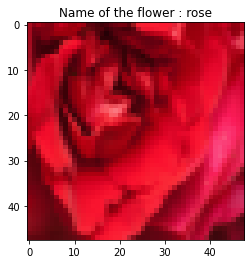

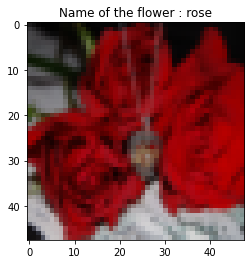

In [38]:
for i in range(3):
    #print('Type of flower :',decoder[y_train[i]])
    plt.title('Name of the flower : ' + decoder[y_train[i]])
    plt.imshow(X_train[i].reshape(48, 48, 3))
    plt.show()

In [39]:
X_train.shape,X_test.shape

((3457, 6912), (866, 6912))

## Reshaping
Теперь мы изменяем форму трейна и теста, поскольку собираемся вводить данные в сверточные нейронные сети.

In [40]:
X_train = X_train.reshape(3457, 48, 48, 3)
X_test = X_test.reshape(866, 48, 48, 3)
y_train = y_train.reshape(3457, 1)
y_test = y_test.reshape(866, 1)

Это изменение формы данных привело к созданию четырехмерного набора данных. Когда он будет встроен в нейронную сеть, он преобразуется в 4-мерные тензоры, которые будут определять прогноз.

# Model Generation
Генерация модели: По мере создания данных мы собираемся построить нашу модель. Есть несколько очень популярных моделей классификации изображений, например
- Inception V3 
- ResNet 
- MobileNet. 

Но здесь мы собираемся создать нашу собственную модель, потому что она должна быть привычкой любого изучающего DL или профессионала DL. Наша модель будет иметь несколько уровней Dense и ConvNet в последовательной структуре.

In [42]:
model = Sequential()

model.add(Conv2D(64, activation='relu', kernel_size=(3, 3), input_shape=X_train[0].shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

После создания модели давайте посмотрим на краткое изложение модели.

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
dense (Dense)                (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

Now we are compiling our model with custom metrics .

We are using:
1. Optimizer ---> Adam (default)
2. Loss ---> Sparse Categorical Crossentropy
3. Metrics ---> Accuracy

In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

И вот мы подошли к самой интересной части всего нашего проекта - **MODEL FITTING**. Мы собираемся объявить размер батча равным 10, что будет соответствовать точности модели и времени. Мы используем 7 эпох для обучения модели, и мы используем тестовые данные в качестве проверки, и, в конце концов, мы также добавляем подробности, так как мы можем видеть, как развивается модель NN. Мы собираемся сохранить эту подгонку в переменной `hist`, чтобы мы могли видеть, как работает модель, и определять, переообучается ли модель или недостаточно, имеет ли она очень большое смещение или нет.

In [45]:
%%time
hist=model.fit(X_train,y_train,batch_size=10,epochs=7,verbose=1,validation_data=(X_test,y_test))

Epoch 1/7
346/346 [==============================] - 137s 387ms/step - loss: 1.5224 - accuracy: 0.3524 - val_loss: 1.1621 - val_accuracy: 0.5335
Epoch 2/7
346/346 [==============================] - 136s 393ms/step - loss: 1.1041 - accuracy: 0.5643 - val_loss: 1.1425 - val_accuracy: 0.5577
Epoch 3/7
346/346 [==============================] - 109s 314ms/step - loss: 0.9001 - accuracy: 0.6564 - val_loss: 1.1278 - val_accuracy: 0.5808
Epoch 4/7
346/346 [==============================] - 98s 284ms/step - loss: 0.6554 - accuracy: 0.7700 - val_loss: 1.2091 - val_accuracy: 0.5797
Epoch 5/7
346/346 [==============================] - 100s 288ms/step - loss: 0.4693 - accuracy: 0.8374 - val_loss: 1.3695 - val_accuracy: 0.5751
Epoch 6/7
346/346 [==============================] - 116s 334ms/step - loss: 0.3174 - accuracy: 0.8875 - val_loss: 1.5038 - val_accuracy: 0.5831
Epoch 7/7
346/346 [==============================] - 109s 314ms/step - loss: 0.2314 - accuracy: 0.9241 - val_loss: 1.7285 - val_acc

Теперь проверяем работоспособность моделей путем построения графиков.

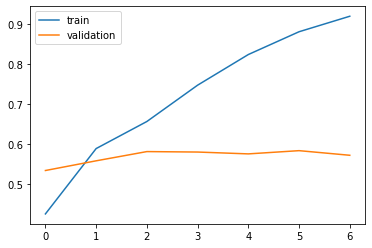

In [46]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

После визуализации графика мы можем сказать, что модель лучше всего настраивается между 2-й и 3-ей эпохами, тогда модель начинает переобучаться данными трейна. Таким образом, оптимально настроенная модель дает 60% точности по сравнению с данными валида. Теперь мы собираемся спрогнозировать тестовые данные, составить confusion matrix и сделать выводы.

In [47]:
y_pred=model.predict(X_test)
type(y_pred)

numpy.ndarray

In [48]:
y_final = []
for i in range(len(y_pred)):
    y_final.append(np.argmax(y_pred[i]))
type(y_final[0])

numpy.int64

После долгого поиска в Интернете (XD) я нашел некоторые объяснения этих ошибочных прогнозов. Это - Роза и Тюльпаны - многолетние растения, и их цвета очень похожи. Одуванчик и Маргаритка - цветы газона, поэтому фон должен быть с зеленой травой. У них также есть длинный стебель, поэтому их можно ошибочно предсказать, даже если модель очень хорошо предсказывает. Одуванчики на самом деле напоминают цвет ромашек с зеленым фоном на некоторых и длинных стеблях, что создает неверные прогнозы для всех типов цветов.

In [53]:
unknown = []
unknown = create_dataframe('flowers/new/', unknown, 5)
dandelion.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,3.0,0.015502,0.023346,0.000000,0.023529,0.027451,0.000000,0.019138,0.023529,0.000000,...,0.000000,0.066667,0.078431,0.000000,0.070588,0.087684,0.000000,0.078431,0.094118,0.003922
1,3.0,0.285376,0.454752,0.010866,0.293219,0.466217,0.005433,0.281454,0.450831,0.000000,...,0.108592,0.422876,0.516490,0.156209,0.421569,0.525041,0.136356,0.392157,0.513725,0.077778
2,3.0,0.833824,0.837745,0.850980,0.831373,0.835294,0.854902,0.827451,0.835294,0.851471,...,0.212745,0.308824,0.295588,0.109804,0.253922,0.308333,0.062745,0.239706,0.249020,0.048529


In [63]:
X_unknown = unknown.drop('label',1).to_numpy()

In [73]:
X_unknown = X_unknown.reshape(X_unknown.shape[0], 48, 48, 3)

In [76]:
y_pred_2 = model.predict(X_unknown)

In [77]:
y_final_2 = []

for i in range(len(y_pred_2)):
    y_final_2.append(np.argmax(y_pred_2[i]))
type(y_final_2[0])

numpy.int64

In [87]:
np.argmax(y_pred_2[i])

4

In [88]:
flowers[np.argmax(y_pred_2[i])]

'tulip'

In [ ]:
X_unknown = unknown.drop('label', 1).to_numpy()
X_unknown = X_unknown.reshape(X_unknown.shape[0], 48, 48, 3)
y_pred_2 = model.predict(X_unknown)

print(flowers[np.argmax(y_pred_2[i])])

---

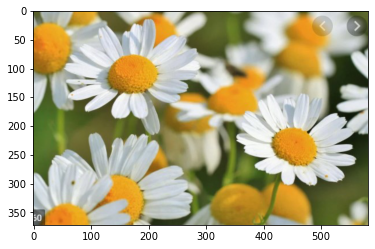

daisy


In [93]:
k = 0
for fil in os.listdir('flowers/new/'):
    link = 'flowers/new/' + fil
    img = mpimg.imread(link)
    plt.imshow(img)
    plt.show()
    k += 1
    if k == 3:
        break
    
    unknown = []
    unknown = create_dataframe('flowers/new/', unknown, 6)
    
    X_unknown = unknown.drop('label', 1).to_numpy()
    X_unknown = X_unknown.reshape(X_unknown.shape[0], 48, 48, 3)
    y_pred_2 = model.predict(X_unknown)

    print(flowers[np.argmax(y_pred_2[i])])